### Importing Necessary Libraries

In [52]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, RocCurveDisplay, accuracy_score, ConfusionMatrixDisplay
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

### Loading and Splitting the dataset into train and test

In [53]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=82)

### Creating Ensemble Model with Logistic Regression, RandomForest and KNeighbours

In [54]:
model1 = LogisticRegression(max_iter=10000,random_state=82)
model2 = RandomForestClassifier(random_state=82)
model3 = KNeighborsClassifier()

ensemble_model = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('knn', model3)], voting='hard')

### Fit the ensemble model and predict the labels for the testing data

In [55]:
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

### Computing the Confusion Matrix for Ensemble Model

Confusion Matrix:


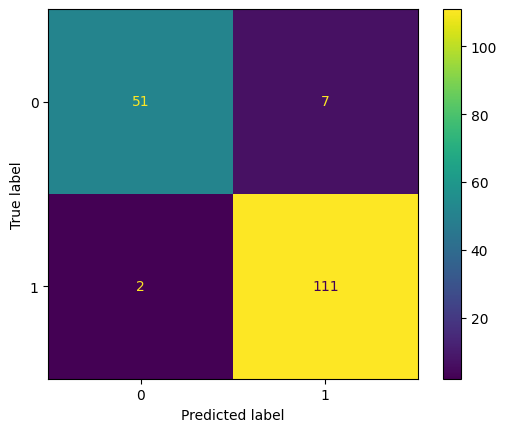

In [56]:
cm = confusion_matrix(y_test, y_pred , labels=ensemble_model.classes_)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble_model.classes_)
disp.plot()
plt.show()

### Compute the accuracy for Ensemble Model

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble model accuracy:", accuracy)

Ensemble model accuracy: 0.9473684210526315


### Create a bagging classifier with decision tree base estimator

In [58]:
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=82)

### Fit the bagging classifier and predict the labels for the testing data

In [59]:
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)

### Computing the Confusion Matrix for Bagging Classifier

Confusion Matrix:


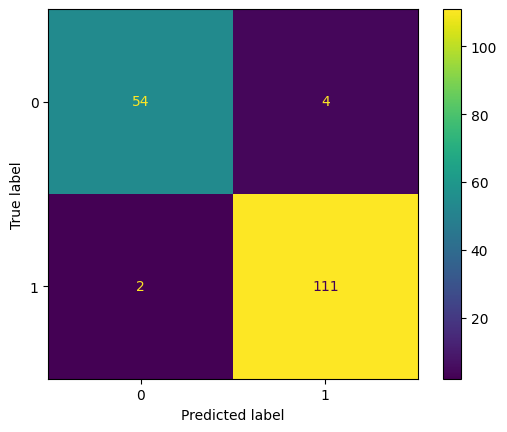

In [60]:
cm = confusion_matrix(y_test, y_pred , labels=bagging_classifier.classes_)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging_classifier.classes_)
disp.plot()
plt.show()

### Compute the accuracy score for Bagging Classifier

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.9649122807017544


### Evaluate the bagging classifier using cross-validation

In [62]:
scores = cross_val_score(bagging_classifier, X, y, cv=10)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.98245614 0.94736842 0.92982456 0.96491228 0.98245614 0.98245614
 0.92982456 0.94736842 0.89473684 1.        ]
Mean cross-validation score: 0.956140350877193


### Evaluate the bagging classifier with KNN base estimator using cross-validation

In [63]:
bagging_knn = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=10, random_state=42)
scores_knn = cross_val_score(bagging_knn, X, y, cv=10)
print("Cross-validation scores (KNN):", scores_knn)
print("Mean cross-validation score (KNN):", scores_knn.mean())

Cross-validation scores (KNN): [0.92982456 0.87719298 0.9122807  0.96491228 0.94736842 0.94736842
 0.98245614 0.92982456 0.9122807  0.94642857]
Mean cross-validation score (KNN): 0.9349937343358394
